In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [4]:
columns = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv(r"C:\Users\laksh\OneDrive\Desktop\Excel files\Twitter_data.csv", encoding='ISO-8859-1', header=None, names=columns)

In [5]:
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
print("Last few rows of the dataset:")
display(df.tail())

Last few rows of the dataset:


,target,ids,date,flag,user,text
1048571,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048575,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [7]:
print("\nInformation about the dataset:")
display(df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


None

In [8]:
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(1048576, 6)


In [9]:
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [10]:
print("\nDistribution of the 'target' column:")
print(df['target'].value_counts())


Distribution of the 'target' column:
target
0    800000
4    248576
Name: count, dtype: int64


In [12]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 585.1 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 656.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.4 kB 532.5 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/301.4 kB 795.7 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/301.4 kB 795.7 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 746.5 kB/s eta 0:00:00


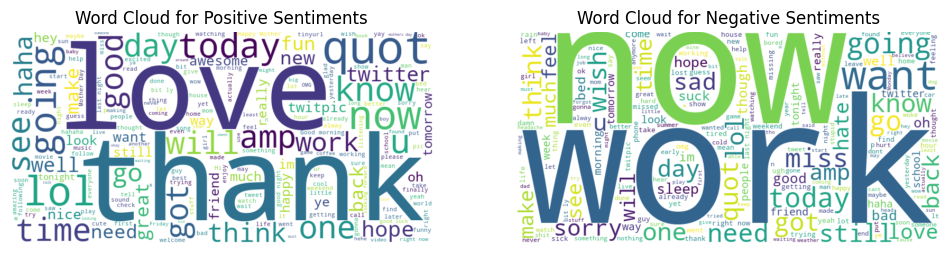

In [14]:
from wordcloud import WordCloud


positive_text = ' '.join(df[df['target'] == 4]['text'])
negative_text = ' '.join(df[df['target'] == 0]['text'])


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.show()


In [15]:
print("\nSample text from the 'text' column:")
display(df['text'].head())


Sample text from the 'text' column:


0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [16]:
df['text_length'] = df['text'].apply(len)
print("\nStatistics of text lengths:")
print(df['text_length'].describe())


Statistics of text lengths:
count    1.048576e+06
mean     7.429772e+01
std      3.660257e+01
min      6.000000e+00
25%      4.400000e+01
50%      7.000000e+01
75%      1.040000e+02
max      3.590000e+02
Name: text_length, dtype: float64


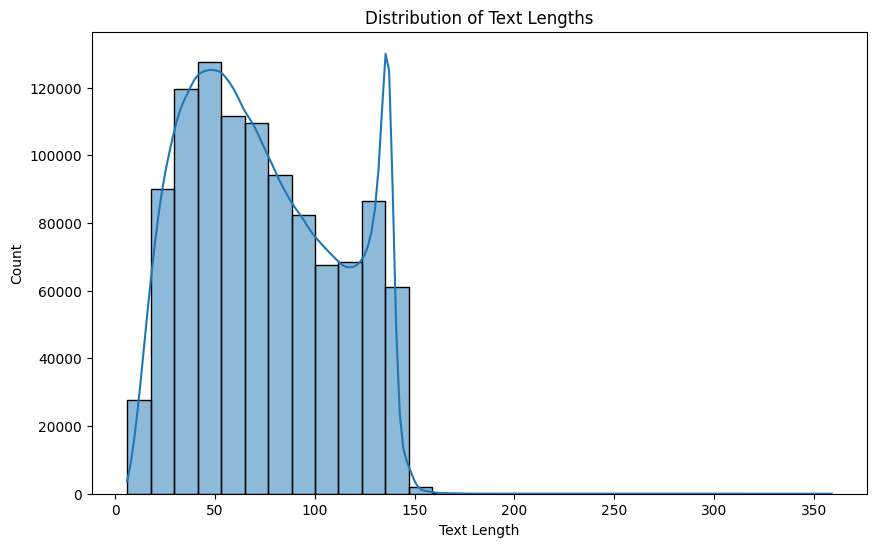

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

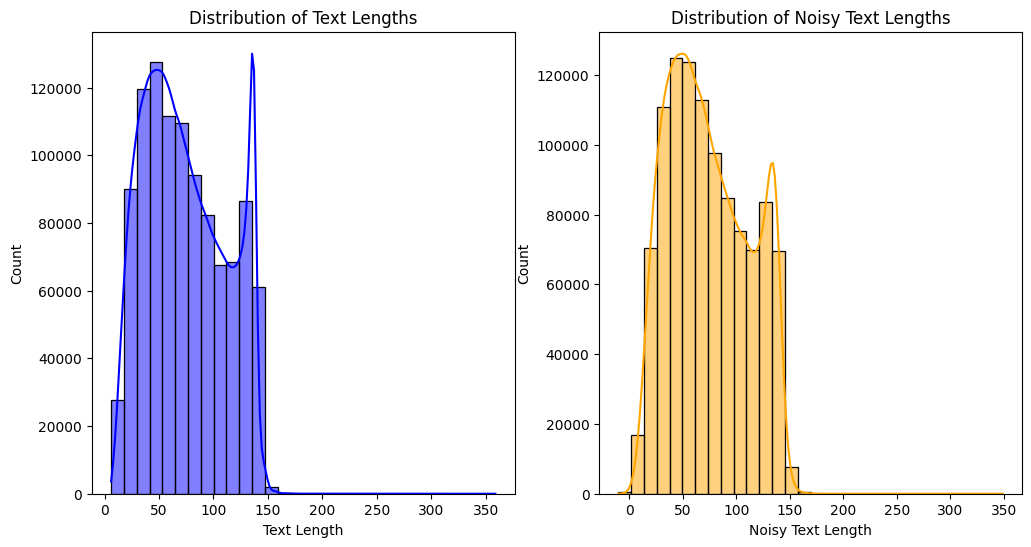

In [18]:
np.random.seed(42)
noise = np.random.normal(0, 5, df.shape[0])  
df['noisy_text_length'] = df['text_length'] + noise

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['noisy_text_length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Noisy Text Lengths')
plt.xlabel('Noisy Text Length')
plt.ylabel('Count')

plt.show()

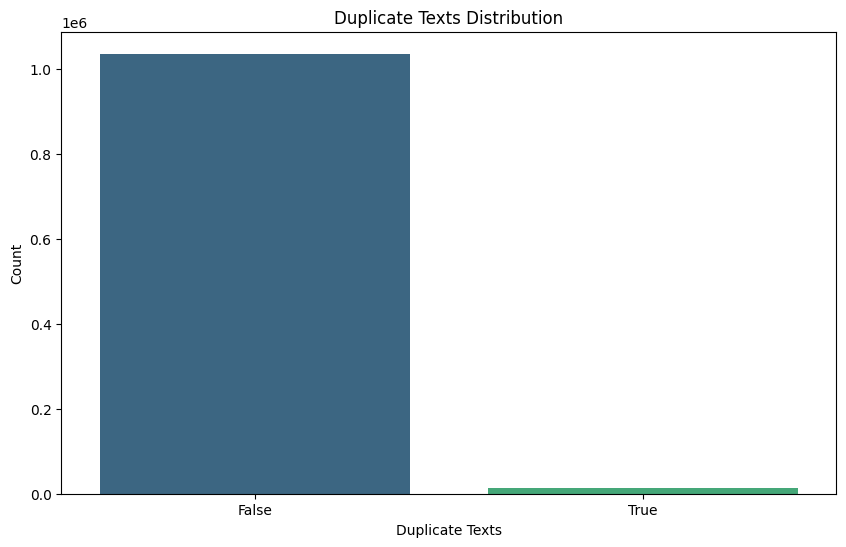

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.duplicated(subset='text'), palette='viridis')
plt.title('Duplicate Texts Distribution')
plt.xlabel('Duplicate Texts')
plt.ylabel('Count')
plt.show()

In [20]:
print("\nClass distribution:")
print(df['target'].value_counts())


Class distribution:
target
0    800000
4    248576
Name: count, dtype: int64


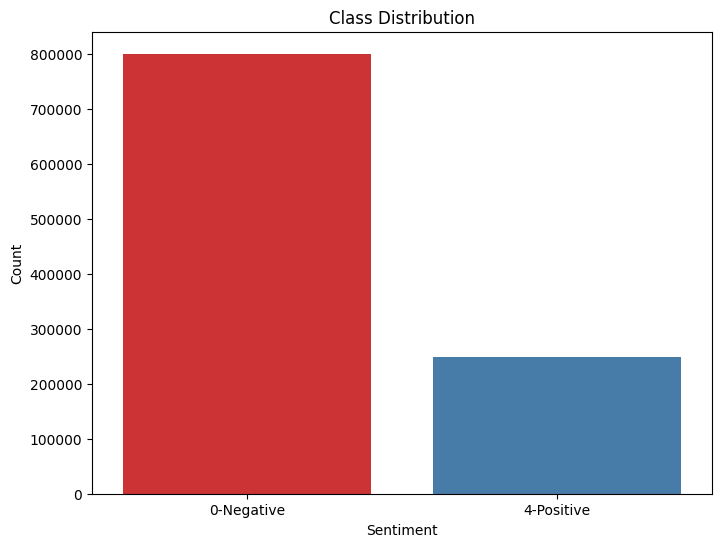

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
plt.show()

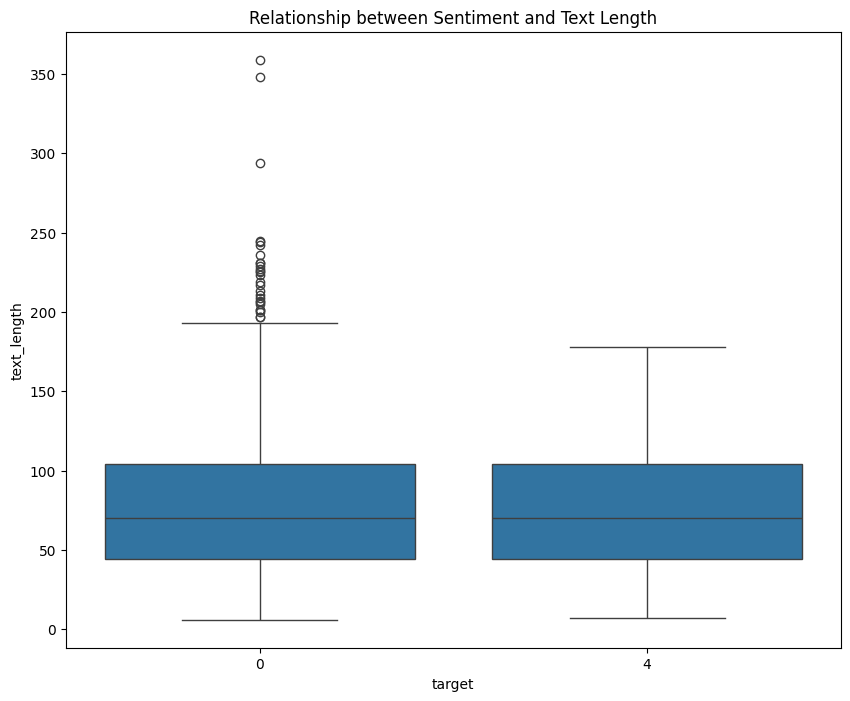

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='target', y='text_length', data=df)
plt.title('Relationship between Sentiment and Text Length')
plt.show()

In [23]:
duplicate_pairs = df[df.duplicated(subset='text', keep=False)]
duplicate_pairs = duplicate_pairs.sort_values(by='text')

In [24]:
print("Pairs of Duplicate Text:")
display(duplicate_pairs[['text']])

Pairs of Duplicate Text:


,text
271505,David must be hospitalized for five days end...
271472,David must be hospitalized for five days end...
540173,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
540159,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #...
331063,*tear*
...,...
194992,yuckkk its pouring rain &amp; im filthy now!! ...
458170,"zofran is not making this work day any easier,..."
457131,"zofran is not making this work day any easier,..."
464810,~ get SUICIDE !!


In [25]:
df_deduplicated = df.drop_duplicates()
df_deduplicated_text = df.drop_duplicates(subset='text')

In [26]:
print("Original DataFrame Shape:", df.shape)
print("Deduplicated DataFrame Shape:", df_deduplicated.shape)
df_deduplicated_text['target'].value_counts()

Original DataFrame Shape: (1048576, 8)
Deduplicated DataFrame Shape: (1048576, 8)


target
0    790185
4    245951
Name: count, dtype: int64

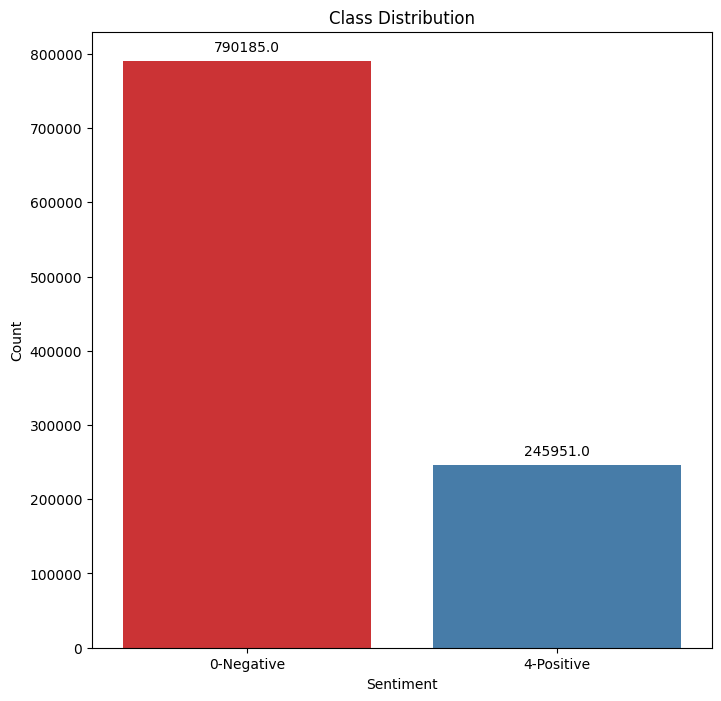

In [27]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='target', data=df_deduplicated_text, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0-Negative', '4-Positive'])  # Set custom x-axis labels
#
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [28]:
df = df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [30]:
import re

stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
    'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off','over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
    'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn',
    'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'
])
custom_lemmatization_rules = {
    'amazing': 'amaze',
    'better': 'good',
    'excellent': 'excel',
    'fantastic': 'fantastic',
    'good': 'good',
    'great': 'great',
    'happy': 'happy',
    'love': 'love',
    'positive': 'positive',
    'wonderful': 'wonderful',
    'splendid': 'splendid',
    'superb': 'superb',
    'marvelous': 'marvelous',
    'outstanding': 'outstanding',
    'terrific': 'terrific',
    'delightful': 'delightful',
    'amazing': 'amazing',
    'magnificent': 'magnificent',
    'joyous': 'joyous','impressive': 'impressive',
    'fabulous': 'fabulous',

    'awful': 'awful',
    'bad': 'bad',
    'disappointing': 'disappoint',
    'horrible': 'horrible',
    'negative': 'negative',
    'poor': 'poor',
    'terrible': 'terrible',
    'unhappy': 'unhappy',
    'terrible': 'terrible',
    'miserable': 'miserable',
    'sad': 'sad',
    'gloomy': 'gloomy',
    'unsatisfactory': 'unsatisfactory',
    'dreadful': 'dreadful',
    'unpleasant': 'unpleasant','distressing': 'distress',
    'disheartening': 'dishearten',
    'frustrating': 'frustrate',
    'annoying': 'annoy',
    'irritating': 'irritate',
    'regrettable': 'regret',
    'negative': 'negative',
    'unpleasant': 'unpleasant',
    'dismal': 'dismal',
    'depressing': 'depress',
    'displeasing': 'displease',
    'disgusting': 'disgust',}

# Lemmatization function
def custom_lemmatize(word):
    return custom_lemmatization_rules.get(word, word)


def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove common punctuation as delimiters
    text = re.sub(r'[^\w\s]', '', text)# Numerical character removal
    text = re.sub('[0-9]+', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Removing user@ references and #
    text = re.sub(r'\@\w+|\#\w+', '', text)

    # Tokenization (simple split)
    filtered_list = text.split()

        # Stopword removal
    filtered_list = [word for word in filtered_list if word not in stop_words]
    
    # Lemmatization
    filtered_list = [custom_lemmatize(word) for word in filtered_list]

    cleaned_text = " ".join(filtered_list)
    return cleaned_text

dirty_text = "Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com"
cleaned_text = clean_text(dirty_text)

print("Original Text:", dirty_text)
print("Cleaned and Lemmatized Text:", cleaned_text)

Original Text: Hello!   This is an excellent good better example text with some 123 special characters and a URL http://example.com
Cleaned and Lemmatized Text: hello excel good good example text special characters url


In [31]:
df_deduplicated_text['cleaned_text'] = df_deduplicated_text['text'].apply(clean_text)
display(df_deduplicated_text['cleaned_text'])

0          switchfoot thats bummer shoulda got david carr...
1          upset cant update facebook texting might cry r...
2          kenichan dived many times ball managed save re...
3                           whole body feels itchy like fire
4                   nationwideclass behaving im mad cant see
                                 ...                        
1048571                            grandma making dinenr mum
1048572        midmorning snack time bowl cheese noodles yum
1048573    shadela say like terminiator movies comes like...
1048574                    destinyhope im great thaanks wbuu
1048575                           cant wait til date weekend
Name: cleaned_text, Length: 1036136, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_deduplicated_text['target_encoded'] = label_encoder.fit_transform(df_deduplicated_text['target'])
df_deduplicated_text['target_encoded']

0          0
1          0
2          0
3          0
4          0
          ..
1048571    1
1048572    1
1048573    1
1048574    1
1048575    1
Name: target_encoded, Length: 1036136, dtype: int64

In [33]:
df_deduplicated_text['target_encoded'].value_counts()

target_encoded
0    790185
1    245951
Name: count, dtype: int64

In [35]:
max_sample_size = 1000
subset_df = df_deduplicated_text.groupby('target').apply(lambda x: x.sample(n=max_sample_size // 2)).reset_index(drop=True)
subset_df['target'].value_counts()

target
0    500
4    500
Name: count, dtype: int64

In [36]:
model = make_pipeline(TfidfVectorizer())

param_grid = {
    'tfidfvectorizer__max_features': [85,90,95,100,110,120],  
    
}

In [37]:
X_train, X_test, y_train, y_test = train_test_split(subset_df['cleaned_text'], subset_df['target_encoded'], test_size=0.3, random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer())]),
             param_grid={'tfidfvectorizer__max_features': [85, 90, 95, 100, 110,
                                                           120]},
             scoring='accuracy')

In [39]:
best_params_ = grid_search.best_params_
print("Best Hyperparameters :", best_params_)

Best Hyperparameters : {'tfidfvectorizer__max_features': 85}


In [40]:
best_max_features = best_params_['tfidfvectorizer__max_features']

In [41]:
vectorizer = TfidfVectorizer(max_features=best_max_features,min_df=2, max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB



param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0,5,10,15,20,25,30, 35,40,44,45,50,55,60,65,75,100,110,115,120]}
nb_classifier_tuned = GridSearchCV(MultinomialNB(), param_grid, cv=5)
nb_classifier_tuned.fit(X_train_tfidf, y_train)

# Best hyperparameter
best_alpha = nb_classifier_tuned.best_params_['alpha']

In [43]:
nb_classifier = MultinomialNB(alpha=best_alpha)
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [44]:
nb_cross_val_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)
print('Naive Bayes Cross-Validation Scores:', nb_cross_val_scores)

Naive Bayes Cross-Validation Scores: [0.59285714 0.59285714 0.66428571 0.62142857 0.59285714]


In [45]:
print("Mean Accuracy:", nb_cross_val_scores.mean())

Mean Accuracy: 0.6128571428571429


In [46]:
nb_predictions_train = nb_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train,nb_predictions_train)
train_accuracy

0.6942857142857143

In [47]:
nb_predictions = nb_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test,nb_predictions)
test_accuracy

0.6166666666666667

In [48]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_classification_report = classification_report(y_test, nb_predictions)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
nb_confusion_matrix

array([[103,  47],
       [ 68,  82]], dtype=int64)

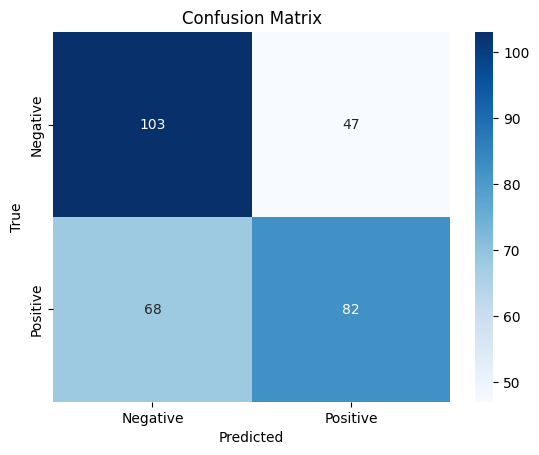

In [49]:
conf_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
print(f'Naive Bayes Accuracy: {nb_accuracy:.2f}')
print('Naive Bayes Classification Report:')
print(nb_classification_report)
print('Naive Bayes Confusion Matrix:')
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.62
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64       150
           1       0.64      0.55      0.59       150

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.61       300
weighted avg       0.62      0.62      0.61       300

Naive Bayes Confusion Matrix:
[[103  47]
 [ 68  82]]


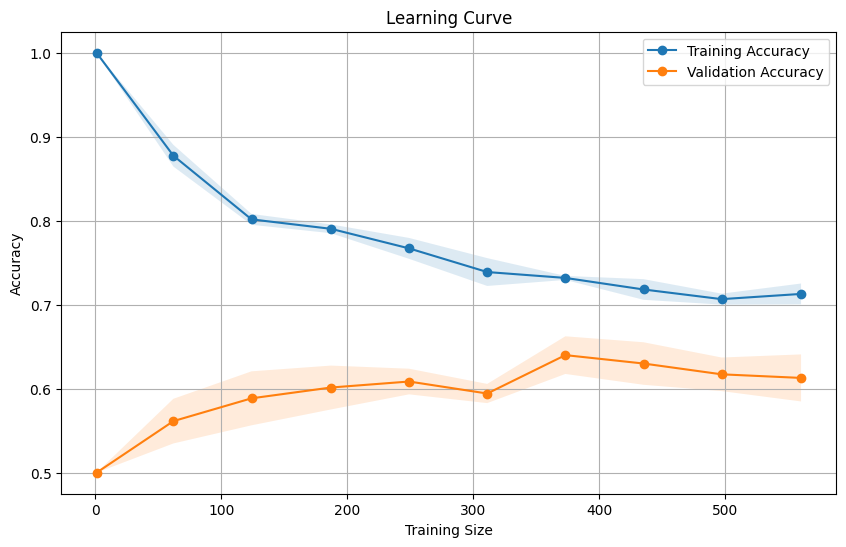

In [51]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    nb_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.001, 1.0, 10)
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

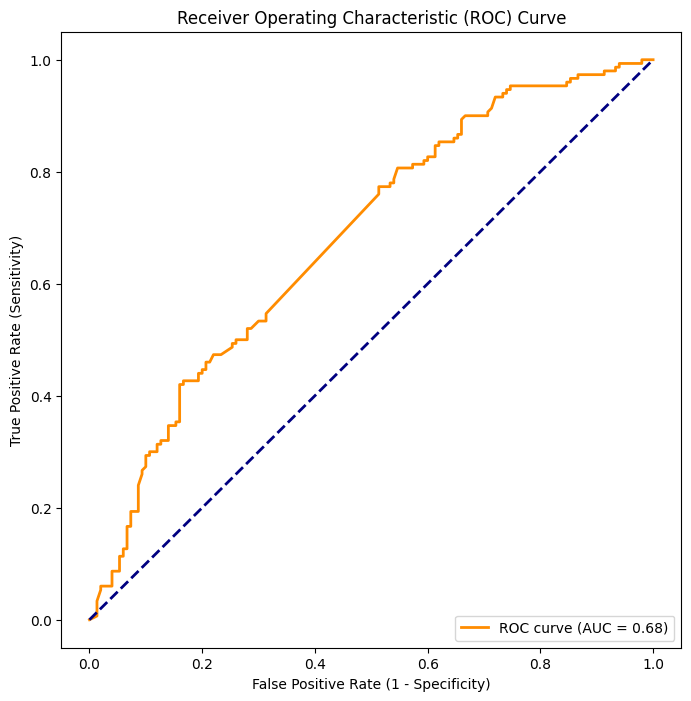

In [52]:
from sklearn.metrics import roc_curve, auc

nb_probabilities = nb_classifier.predict_proba(X_test_tfidf)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, nb_probabilities)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
new_tweet = 'ah, congrats mr flrtcher for finally joining twitter'
cleaned_new_tweet = clean_text(new_tweet)
vect_tweet = vectorizer.transform([cleaned_new_tweet])
prediction = nb_classifier.predict(vect_tweet)
print('Predicted Sentiment for the new tweet:', 'Positive' if prediction[0] == 1 else 'Negative')

Predicted Sentiment for the new tweet: Negative


In [54]:
from sklearn.linear_model import LogisticRegression


param_grid = {'C': [0.001, 0.01, 0.1, 1,5, 10,15, 100], 'penalty': ['l2']}
logistic_classifier_tuned = GridSearchCV(LogisticRegression(), param_grid, cv=5)
logistic_classifier_tuned.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 100],
                         'penalty': ['l2']})

In [55]:
best_C = logistic_classifier_tuned.best_params_['C']
best_penalty = logistic_classifier_tuned.best_params_['penalty']

In [56]:
logistic_classifier = LogisticRegression(C=best_C, penalty=best_penalty)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(C=0.001)

In [57]:
lr_cross_val_scores = cross_val_score(logistic_classifier, X_train_tfidf, y_train, cv=5)
print('Logistics Cross-Validation Scores:', lr_cross_val_scores)

Logistics Cross-Validation Scores: [0.62142857 0.6        0.65       0.57857143 0.57857143]


In [58]:
print("Mean Accuracy:", lr_cross_val_scores.mean())

Mean Accuracy: 0.6057142857142858
